In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Functions import *
import re

In [26]:
np.linspace(0.5,2.5,11)

array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5])

In [3]:
filename = "./results/3D concentric rings/Scanning_L_lower_and_gapx_width_0_3_2_3_gapx_2_5_3_5.csv"

In [4]:
Beta_Upper_ring = 5983.180936564255       # L_inner = 2.8um

In [5]:
Y_data      = ()
gap_arr     = []
L_arr       = []
data_arr    = []
data_arr_zero_loc_list = []

In [6]:
df              = pd.read_csv(filename)
gap_arr         = df["gap/L_lower"]
num_of_gap_pts  = len(gap_arr)

In [7]:
df

,gap/L_lower,2.5,2.6,2.7,2.8,2.9,3,3.1,3.2,3.3,3.4,3.5
0,0.3,5971.908102,5975.307124,5978.463853,5981.398987,5984.131445,5986.678457,5989.055691,5991.277374,5993.356416,5995.304533,5997.132357
1,0.4,5971.310759,5974.709442,5977.865857,5980.800700,5983.532885,5986.079645,5988.456644,5990.678107,5992.855642,5994.704869,5996.532514
2,0.5,5970.713416,5974.111761,5977.267861,5980.202412,5982.934326,5985.480833,5987.857597,5990.078840,5992.157472,5994.105205,5995.932670
3,0.6,5970.116073,5973.514079,5976.669865,5979.604124,5982.335767,5984.882022,5987.258550,5989.479573,5991.558000,5993.505541,5995.332827
4,0.7,5969.518730,5972.916397,5976.071869,5979.005836,5981.737208,5984.283210,5986.659502,5988.880306,5990.958528,5992.905877,5994.732983
5,0.8,5968.921387,5972.318716,5975.473873,5978.407548,5981.138649,5983.684398,5986.060455,5988.281040,5990.359056,5992.306213,5994.133140
6,0.9,5968.324044,5971.721034,5974.875877,5977.809261,5980.540090,5983.085586,5985.461408,5987.681773,5989.759584,5991.706549,5993.533297
7,1.0,5967.726701,5971.123352,5974.277881,5977.210973,5979.941530,5982.486774,5984.862361,5987.082506,5989.160112,5991.106885,5992.933453
8,1.1,5967.129358,5970.525671,5973.679885,5976.612685,5979.342971,5981.887963,5984.263313,5986.483239,5988.560640,5990.507222,5992.333610
9,1.2,5966.532015,5969.927989,5973.081889,5976.014397,5978.744412,5981.289151,5983.664266,5985.883972,5987.961168,5989.907558,5991.733766


In [8]:
# wavl_arr_ori    = wavl_arr[xticks_ori]
# wavl_arr_ticks  = ["{:.3f}".format(wavl) for wavl in wavl_arr_ori]
for column in df.columns[1:]:
    L       = float(column)
    L_arr.append(L)
    data_arr.append(df[column]-Beta_Upper_ring)

data_arr = np.array(data_arr)

In [9]:
for i in range(np.shape(data_arr)[0]):
    line = data_arr[i,:]

    for j in range(len(line)-1):
        if line[j] * line[j+1] < 0:
            shift = np.abs(line[j])/(np.abs(line[j])+np.abs(line[j+1]))
            data_arr_zero_loc_list.append([i,L_arr[i],j+shift])

# data_arr_neg_mask = np.where(data_arr<0)
# data_arr[data_arr_neg_mask] = -np.log10(-data_arr[data_arr_neg_mask])
# data_arr_neg_mask = np.where(data_arr>0)
# data_arr[data_arr_neg_mask] = np.log10(data_arr[data_arr_neg_mask])

num_of_L_pts    = len(L_arr)
xticks_ori      = np.arange(0,num_of_L_pts,1)

data_arr_zero_loc_list = np.array(data_arr_zero_loc_list)
data_arr_zero_loc_list

array([[ 4.        ,  2.9       ,  1.58799351],
       [ 5.        ,  3.        ,  5.84076744],
       [ 6.        ,  3.1       ,  9.80683076],
       [ 7.        ,  3.2       , 13.51057065],
       [ 8.        ,  3.3       , 16.97406858]])

In [10]:
width_arr_intp  = np.linspace(3.6,9,20)
phase_matched_gap_intp = Interpolation(data_arr_zero_loc_list[:,0], data_arr_zero_loc_list[:,2],width_arr_intp)

In [11]:
from matplotlib.colors import TwoSlopeNorm
fonttype        = "Helvetica"
fontsize        = 5
colormap        = "bwr"
# colormap      = "berlin"
figsize         = (10,8)
cbar_num_of_pts = 6
norm            = TwoSlopeNorm(vmin=np.min(data_arr), vcenter=0, vmax=np.max(data_arr))
norm

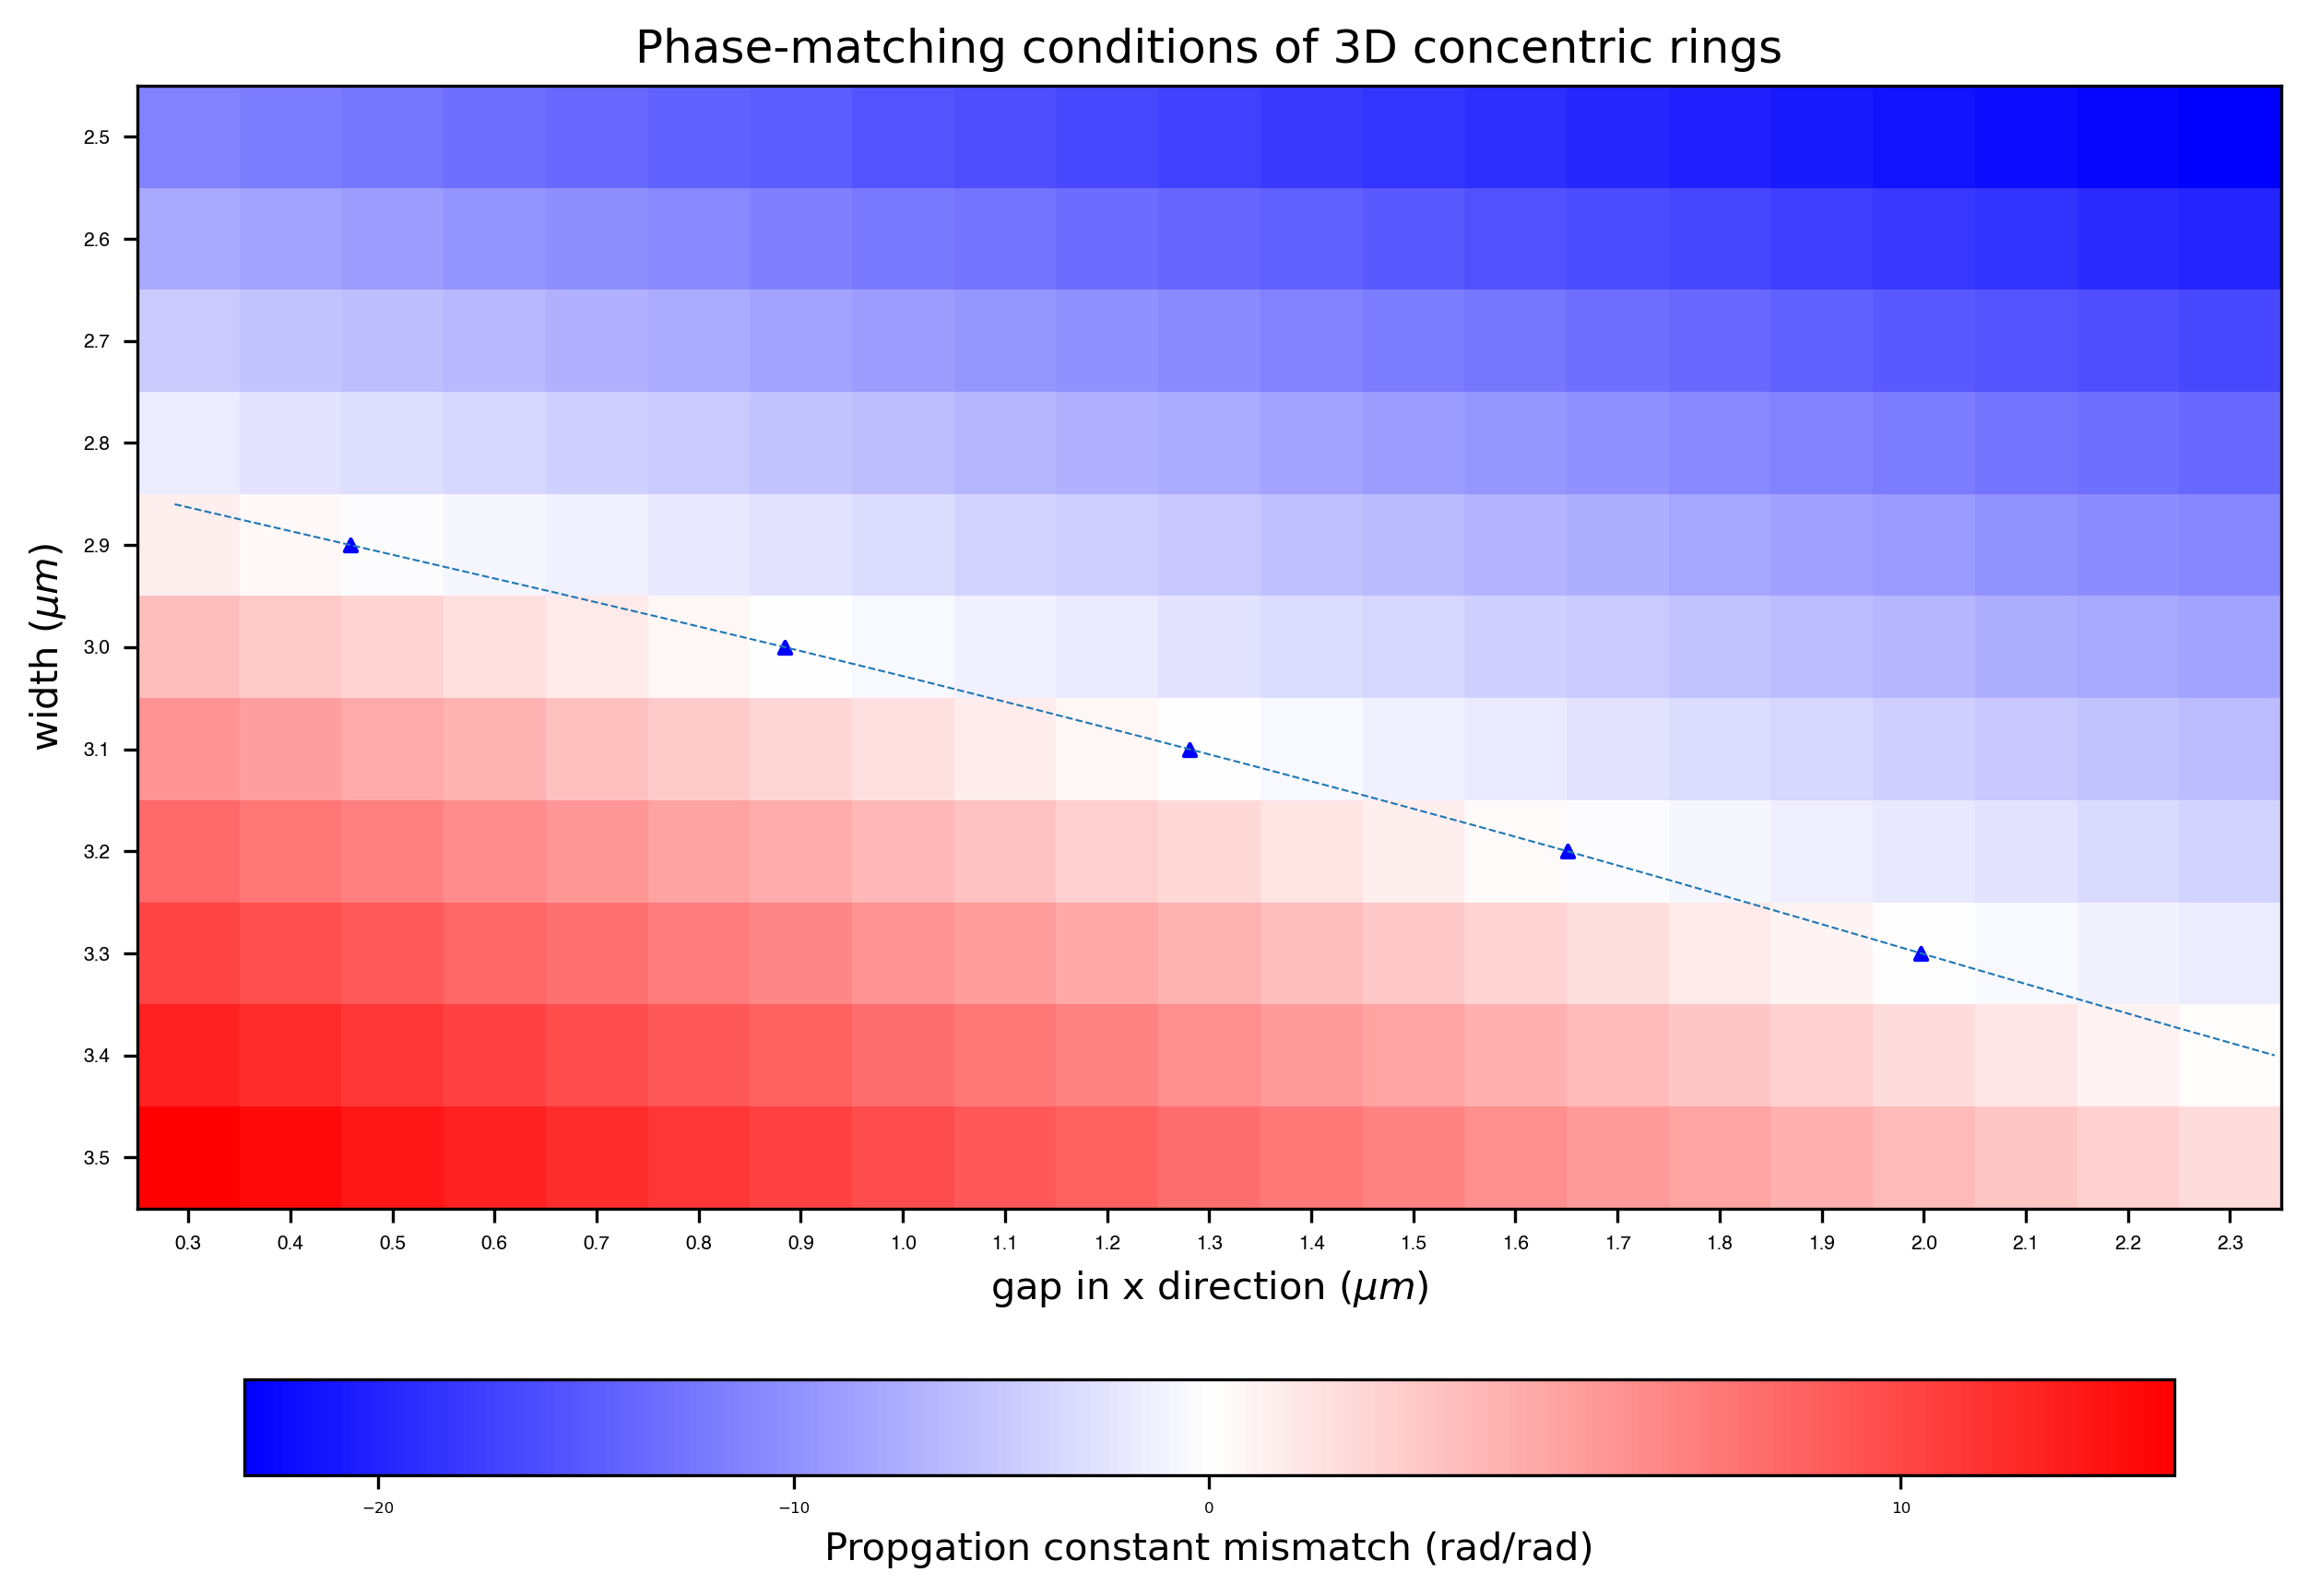

In [12]:

fig, ax = plt.subplots(figsize=figsize,dpi=300)
im      = ax.imshow(data_arr, cmap = colormap, norm = norm, aspect=1)
ax.scatter(data_arr_zero_loc_list[:,2],data_arr_zero_loc_list[:,0], s=10, c='b', marker='^',)
plt.plot(phase_matched_gap_intp,width_arr_intp, linewidth=0.5, linestyle = "--")

cbar = fig.colorbar(im, ax=ax, orientation='horizontal',
                    shrink=0.9, pad=0.1)  # shrink: 缩放比例，pad: 间距
cbar.set_ticks(Auto_ticks(data_arr))
cbar.ax.tick_params(labelsize=fontsize*0.8)
# cbar.set_label(r"sgn(D) $\log_{10}$($|D|$)")
cbar.set_label(r"Propgation constant mismatch (rad/rad)")

plt.xticks(np.arange(0,num_of_gap_pts,1),gap_arr,fontproperties = fonttype, size = fontsize)
plt.yticks(np.arange(0,num_of_L_pts,1),L_arr,fontproperties = fonttype, size = fontsize)
plt.xlabel(r"gap in x direction ($\mu m$)")
plt.ylabel(r"width ($\mu m$)")
title = "Phase-matching conditions of 3D concentric rings"
plt.title(title)
plt.savefig("./results/"+title+".jpg")
plt.show()

WG width: 2.9 um

gapx: 1.58799351 um

In [13]:
N = 3
k = 0.1
d = 1
A = np.diag(np.ones(N-1)*k,1) + np.diag(np.ones(N-1)*k,-1) + np.diag(np.ones(N)*d,0)
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvalues

array([0.85857864, 1.        , 1.14142136])

In [14]:
N = 4
k = 0.1
d = 1
A = np.diag(np.ones(N-1)*k,1) + np.diag(np.ones(N-1)*k,-1) + np.diag(np.ones(N)*d,0)
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvalues

array([0.8381966, 0.9381966, 1.1618034, 1.0618034])

In [15]:
filename_D_iso      = "./results/3D concentric rings/Dispersion_isolated_WG_3D_concentric.csv"
filename_D_coupled  = "./results/3D concentric rings/Dispersion_coupled_WG_3D_concentric.csv"
df_iso              = pd.read_csv(filename_D_iso)
df_iso

,wavl,"AS(5.00,0.00)","S(5.00,0.00)","AS( double 5.00,0.00)","S( double 5.00,0.00)"
0,1.406061,-692.967857,-692.967857,-692.967857,-692.967857
1,1.409091,-689.904171,-689.904171,-689.904171,-689.904171
2,1.412121,-686.874214,-686.874214,-686.874214,-686.874214
3,1.415152,-683.877466,-683.877466,-683.877466,-683.877466
4,1.418182,-680.913408,-680.913408,-680.913408,-680.913408
...,...,...,...,...,...
91,1.681818,-489.294254,-489.294254,-489.294254,-489.294254
92,1.684848,-487.176422,-487.176422,-487.176422,-487.176422
93,1.687879,-485.045132,-485.045132,-485.045132,-485.045132
94,1.690909,-482.899865,-482.899865,-482.899865,-482.899865


In [16]:
fold_num    = 10
Y_data      = ()
gap_arr     = []
data_arr    = []

df_coupled = pd.read_csv(filename_D_coupled)
df_coupled

,wavl,"AS(5.00,0.00)","S(5.00,0.00)","AS( double 5.00,0.00)","S( double 5.00,0.00)"
0,1.406061,-635.039278,-750.896435,-577.110699,-808.825014
1,1.409091,-632.030658,-747.777685,-574.157144,-805.651199
2,1.412121,-630.239749,-743.508679,-573.605284,-800.143144
3,1.415152,-629.459567,-738.295364,-575.041668,-792.713263
4,1.418182,-628.808078,-733.018737,-576.702749,-785.124067
...,...,...,...,...,...
91,1.681818,-579.852627,-398.735881,-670.411000,-308.177508
92,1.684848,-594.335250,-380.017594,-701.494079,-272.858766
93,1.687879,-605.079860,-365.010404,-725.114588,-244.975676
94,1.690909,-591.970923,-373.828807,-701.041981,-264.757749


In [17]:
data_arr = (np.c_[df_iso.to_numpy()[:,:2],df_coupled.to_numpy()[:,1:]],)
# xticks_ori      = np.arange(0,num_of_wavl_pts,int(num_of_wavl_pts/fold_num))
# wavl_arr_ori    = wavl_arr[xticks_ori]
# wavl_arr        = df_coupled["wavl"]
# wavl_arr_ticks  = ["{:.3f}".format(wavl) for wavl in wavl_arr_ori]

# data_arr = np.array(data_arr)
# data_arr = (np.c_[wavl_arr, data_arr],)

data_label_arr  = ["N = 1","","N = 2","",r"N$\to \infty$"]*3
color_list      = ['indianred']+['Orange']*2+['tab:blue']*2+['tab:green']*2+['black']*10
linestyle_list  = ["--"]+["-","-"]*10

# xticks       = np.arange(-Max_M_idx,Max_M_idx+1)
# xtickslabels = [("$M_0$+" if xtick>0 else "$M_0$") + str(xtick) + "M"
#                 for xtick in xticks]
# xtickslabels[int(len(xtickslabels)/2)] = "$M_0$"
# xticks       = np.arange(-Max_M_idx,Max_M_idx+1)*M
# yticks       = Auto_ticks(data_arr)
param_dict   = {"Y_legends"     : data_label_arr,
                "X_label"       : r'wavelength($\mu m$)',
                "Y_label"       : "D (pm/km/nm)",
                "title"         : "Dispersion of 3D stacked rings",
                "figsize"       : (8,6),
                "marker_list"   : [""]*15,
                "linestyle_list": linestyle_list,
                "colors_list"   : color_list,
                "xlim"          : (1.52,1.58),
                "ylim"          : (-800,-400),
                "AD_region_color"    : True,
                "bbox_legend"   :(0.4,0.8)}

Plot_curve(data_arr, **param_dict)

# Analysis of the 2D concentric rings structure

The second-order dispersion $D_2$ of the supermodes are analyzed based on data files

Author: Weihao Xu

Date: May. 12th, 2025

## Load data files using pandas

In [18]:
# These CSV files are generated by the "Data_analyzer" class, recording the dispersion at different wavelengths
filename_D_iso      = "./results/3D concentric rings/Supermodes attributes using CMT/Dispersion_isolated_WG.csv"
filename_D_coupled  = "./results/3D concentric rings/Supermodes attributes using CMT/Dispersion_coupled_WG.csv"

In [19]:
df_iso      = pd.read_csv(filename_D_iso)
df_coupled  = pd.read_csv(filename_D_coupled)

In [20]:
# Selecting the range of the gap to be plotted
gap_range = (0,1)

In [21]:
gap_arr = []
data_arr = []
AD_range_list = []

In [22]:
fold_num = 10           # make a wavl tick every 10 wavl points
wavl_arr        = df_coupled["wavl"]
num_of_wavl_pts = len(wavl_arr)
wavl_ticks      = np.arange(0,num_of_wavl_pts,int(num_of_wavl_pts/fold_num))
wavl_labels     = ["{:.3f}".format(wavl_arr[idx]) for idx in wavl_ticks]

In [23]:
# Regular expression to match the column names
pattern = r'^(\w+)\(\s*(-?\d+\.?\d*)\s*,\s*(-?\d+\.?\d*)\s*\)$'
for column in df_coupled.columns[1:]:
    match = re.match(pattern, column)
    if match:
        label = match.group(1)
        gapx = float(match.group(2))  # 转换为整数
        gapy = float(match.group(3))
    else:
        print("No match for " + label)
        continue
    gap = np.sqrt(gapx**2 + gapy**2)
    if gap < min(gap_range) or gap > max(gap_range):
        continue
    gap_arr.append(gap)
    data_arr.append(df_coupled[column])

data_arr = np.array(data_arr)
data_arr

array([[ -741.59337863,  -754.42907209,  -767.30065359, ...,
         -580.70617496,  -573.77265337,  -566.82458325],
       [-1080.98661307, -1047.25565652, -1013.44059027, ...,
         -657.88241302,  -697.81885451,  -737.84053105],
       [-1057.12638696, -1024.90083462,  -992.59506606, ...,
         -663.85511151,  -698.99632607,  -734.21255644],
       [ -731.61344545,  -743.98139045,  -756.38403286, ...,
         -582.51397288,  -573.35334068,  -564.17341455],
       [ -640.1953695 ,  -647.10906938,  -654.04355629, ...,
         -517.16986826,  -500.8829486 ,  -484.56160388]], shape=(5, 496))

In [24]:
# Find the zero dispersion points
data_arr_zero_loc_list = []
for i in range(np.shape(data_arr)[0]):
    line = data_arr[i,:]
    min_zero_idx = len(line)
    max_zero_idx = 0
    for j in range(len(line)-1):
        if line[j] * line[j+1] < 0:
            if j<=min_zero_idx:
                min_zero_idx = j
            if j>=max_zero_idx:
                max_zero_idx = j
            data_arr_zero_loc_list.append([j,i])
    AD_range_list.append([gap_arr[i], max_zero_idx-min_zero_idx,])

AD_range_list = np.array(AD_range_list)
data_arr_zero_loc_list = np.array(data_arr_zero_loc_list)

## Find the gap which can bring the largest Anomalous Dispersion range

In [25]:
param_dict = {
        "figsize"       : [8,8],
        "point_color"   : 'black',
        "point_size"    : 60,
        # "point_marker"  : ".",
        "point_marker"  : "^",
        "norm"          : '',
        # "colormap"      : "bwr",
        "aspect"        : 50,
        "xlabel"        : r"wavelength ($\mu m$)",
        "ylabel"        : r"gap between two rings ($\mu m$)",
        "cbar_label"    : r"Dispersion (ps/nm/km)",
        "autoset_ticks" : 0,
        "cbar_small_ticks" : False,
        "figsize"       : (10,6),
        "title"         : "Dispersion of 2D concentric rings",
        "xticks"        : wavl_ticks,
        "yticks"        : np.arange(0,len(gap_arr),1),
        "xtickslabel"   : wavl_labels,
        "ytickslabel"   : gap_arr,
        "fontsize"      : 8,
        "foldername"    : "./results/"
}
Plot_im(data_arr, **param_dict)